In [1]:
!pip install wordcloud matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
import os
print(os.getcwd())  # Check current working directory
print("File exists:", os.path.isfile("Data.csv"))


c:\Users\Asus\Downloads\PROJECT
File exists: True


In [7]:
import os

print(r"C:\Users\Asus\Downloads\PROJECT\Data.csv.zip", os.getcwd())



C:\Users\Asus\Downloads\PROJECT\Data.csv.zip c:\Users\Asus\Downloads\PROJECT


In [10]:
import pandas as pd

df = pd.read_csv("Data.csv")  # Make sure to use the correct file path
df = df.dropna(subset=['statement', 'status'])


In [11]:
df = df.dropna(subset=['statement', 'status'])


In [12]:
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])


In [13]:
X = df['statement']
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
df['statement'] = df['statement'].astype(str)
df['status'] = df['status'].astype('category')



In [15]:
df = pd.read_csv("Data.csv")  # Make sure the file path is correct

In [16]:
import zipfile

# Path to the CSV file
csv_path = r"C:\Users\Asus\Downloads\PROJECT\Data.csv"

# Path to the zip file you want to create
zip_path = r"C:\Users\Asus\Downloads\PROJECT\Data.csv.zip"

# Create a zip file and add the CSV file to it
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_path, arcname="Data.csv")  # arcname is the name that the file will have inside the zip

print(f"CSV file successfully zipped to {zip_path}")



CSV file successfully zipped to C:\Users\Asus\Downloads\PROJECT\Data.csv.zip


In [17]:
import zipfile
import pandas as pd

# Path to the zip file
zip_path = r"C:\Users\Asus\Downloads\PROJECT\Data.csv.zip"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(r"C:\Users\Asus\Downloads\PROJECT")  # Unzip to same folder

# Now read the CSV
csv_path = r"C:\Users\Asus\Downloads\PROJECT\Data.csv"
df = pd.read_csv(csv_path)

# Preview data
print(df.head())


                               statement  status
0     Feeling happy and motivated today.  Normal
1  Just relaxed with family over dinner.  Normal
2  I love how peaceful everything feels.  Normal
3     Laughing with friends made my day.  Normal
4   Woke up feeling fresh and energetic.  Normal


In [18]:
import os
import pandas as pd

# Change the working directory to the PROJECT folder
os.chdir(r"c:\Users\Asus\Downloads\PROJECT")

# Now read the CSV file directly
df = pd.read_csv("Data.csv")
print(df.head())


                               statement  status
0     Feeling happy and motivated today.  Normal
1  Just relaxed with family over dinner.  Normal
2  I love how peaceful everything feels.  Normal
3     Laughing with friends made my day.  Normal
4   Woke up feeling fresh and energetic.  Normal


In [19]:
import os
print("Current Directory:", os.getcwd())


Current Directory: c:\Users\Asus\Downloads\PROJECT


In [20]:
df = pd.read_csv("Data.csv")

In [21]:
df.head()

,statement,status
0,Feeling happy and motivated today.,Normal
1,Just relaxed with family over dinner.,Normal
2,I love how peaceful everything feels.,Normal
3,Laughing with friends made my day.,Normal
4,Woke up feeling fresh and energetic.,Normal


In [22]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [23]:
df.shape

(237, 2)

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.count

<bound method DataFrame.count of                                  statement      status
0       Feeling happy and motivated today.      Normal
1    Just relaxed with family over dinner.      Normal
2    I love how peaceful everything feels.      Normal
3       Laughing with friends made my day.      Normal
4     Woke up feeling fresh and energetic.      Normal
..                                     ...         ...
232                     No reason to smile  Depression
233                      Holding on barely  Depression
234                      I feel so nervous     Anxiety
235                      Can't wait to die    Suicidal
236                    tired of everything  Depression

[237 rows x 2 columns]>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  237 non-null    object
 1   status     237 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [27]:
df.describe()

,statement,status
count,237,237
unique,237,5
top,Feeling happy and motivated today.,Depression
freq,1,67


In [28]:
df.reset_index(drop=True, inplace=True)

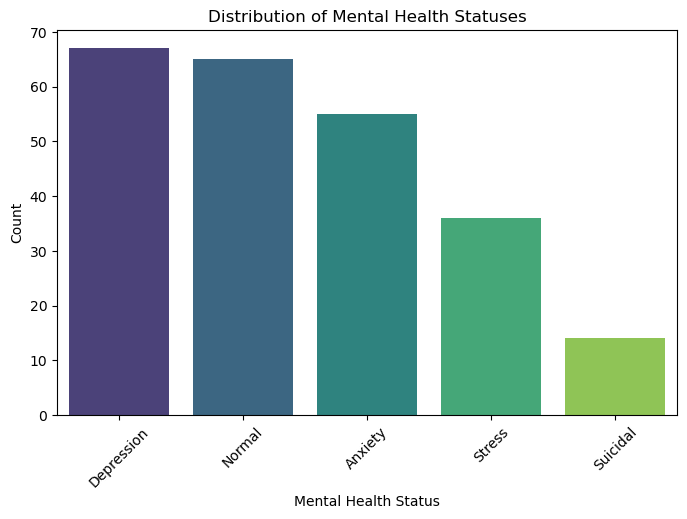

In [29]:
# 1. Distribution of Mental Health Statuses
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index, palette='viridis')
plt.title("Distribution of Mental Health Statuses")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

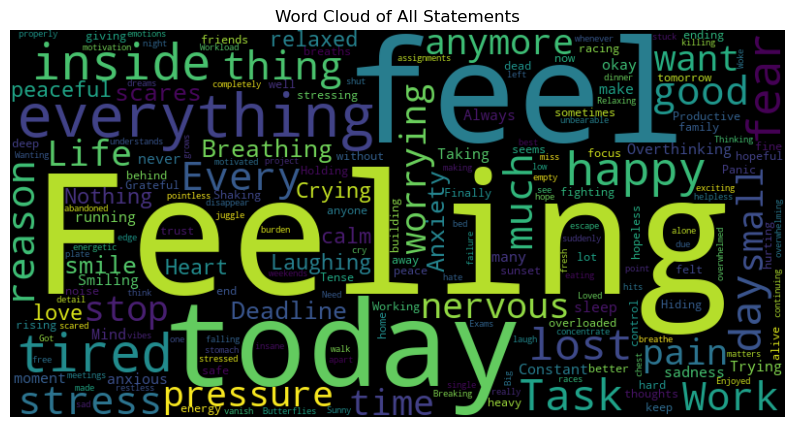

In [30]:
# 2. Word Cloud for the Most Frequent Words in Statements
all_text = " ".join(statement for statement in df['statement'].astype(str))

plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="viridis").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of All Statements")
plt.axis("off")
plt.show()

In [31]:
df['text_length'] = df['statement'].astype(str).apply(len)

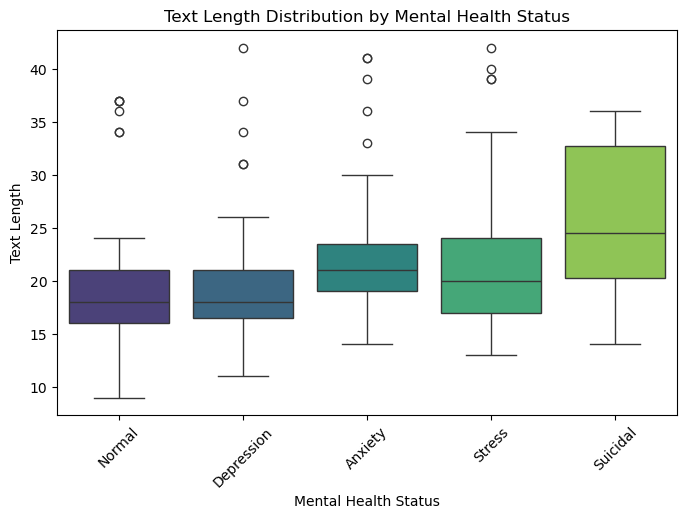

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='status', y='text_length', palette='viridis')
plt.title("Text Length Distribution by Mental Health Status")
plt.xlabel("Mental Health Status")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


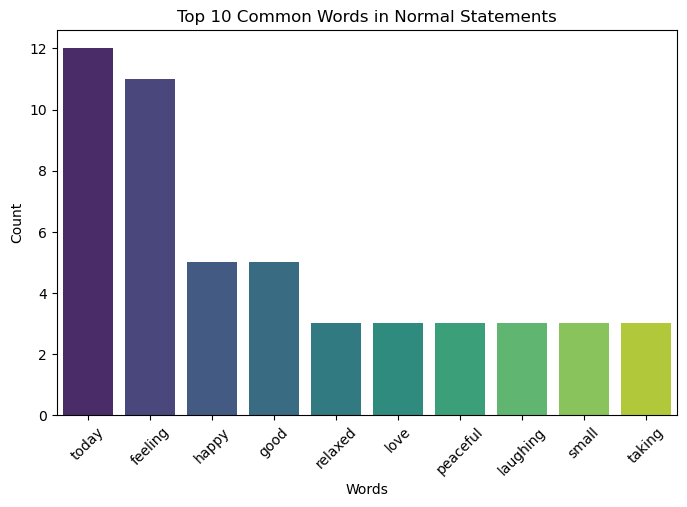

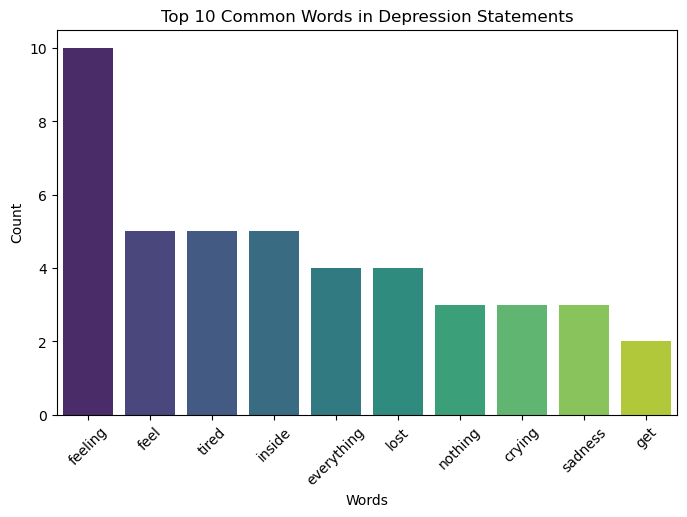

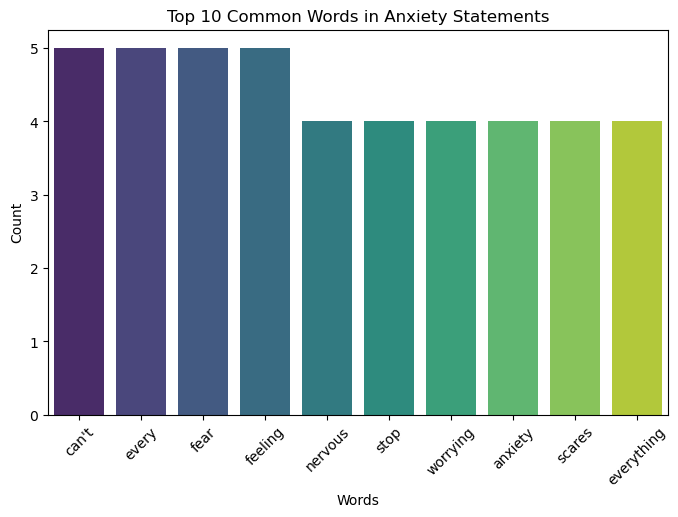

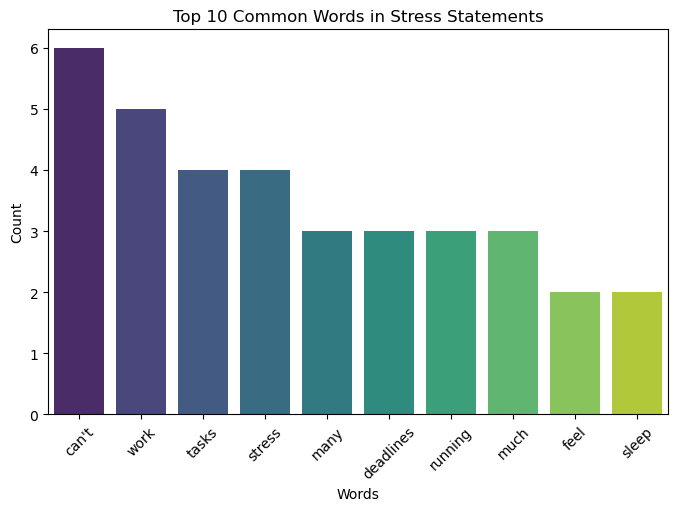

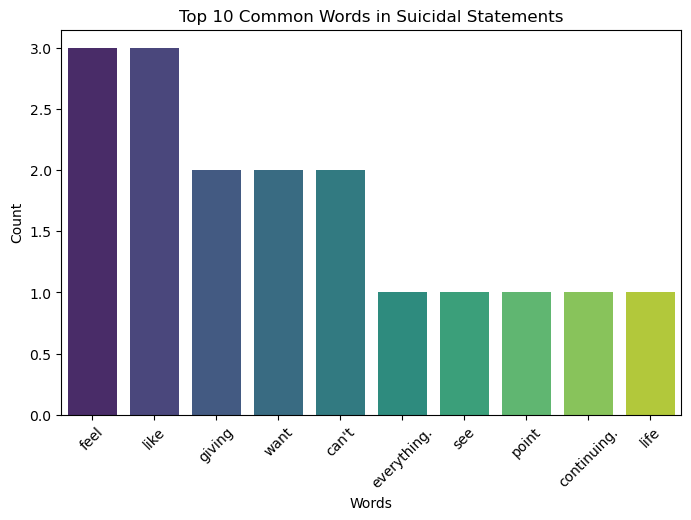

In [33]:
# 4. Most Common Words in Each Status
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def most_common_words(text):
    words = text.lower().split()
    words = [word for word in words if word not in stopwords.words('english')]
    word_counts = Counter(words)
    return word_counts.most_common(10)

for status in df['status'].unique():
    status_text = " ".join(df[df['status'] == status]['statement'].astype(str))
    common_words = most_common_words(status_text)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title(f"Top 10 Common Words in {status} Statements")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

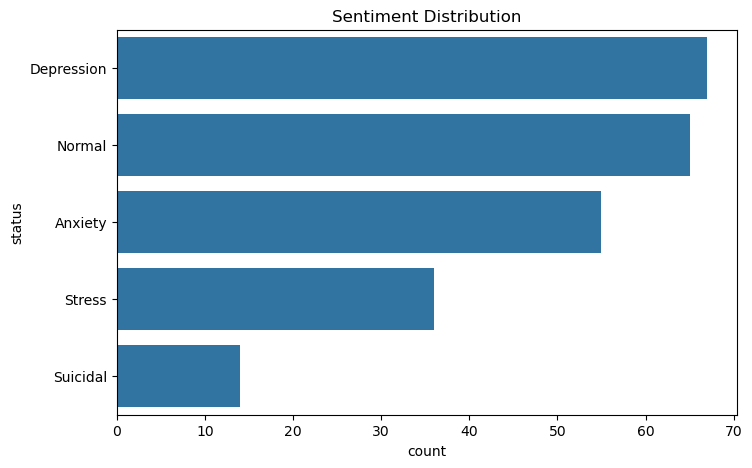

In [34]:
plt.figure(figsize=(8,5)) #to adjust figure size
sns.countplot(y=df["status"], order=df["status"].value_counts().index) #Counter plot, y axis as sentiments with descending order 
plt.title("Sentiment Distribution")
plt.show()

In [35]:
df = df.dropna(subset=['statement'])

In [36]:
print("Missing values before dropping:", df['statement'].isnull().sum())

Missing values before dropping: 0


In [37]:
# Verify the change
print("Missing values after dropping:", df['statement'].isnull().sum())
print("Shape after dropping missing values:", df.shape)

Missing values after dropping: 0
Shape after dropping missing values: (237, 3)


In [66]:
import re
import string

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df['statement'] = df['statement'].astype(str).apply(clean_text)
sample="i am n't busy"
print(clean_text(sample))

i am nt busy


In [ ]:
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [40]:
X = df['statement']
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [42]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [43]:
y_pred_train = model.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Training Accuracy: 0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.78      1.00      0.88        49
           2       0.98      0.98      0.98        45
           3       1.00      0.84      0.91        25
           4       0.00      0.00      0.00         7

    accuracy                           0.91       165
   macro avg       0.75      0.75      0.75       165
weighted avg       0.89      0.91      0.89       165



In [44]:
y_pred = model.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.5416666666666666
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.36      0.72      0.48        18
           2       0.73      0.80      0.76        20
           3       1.00      0.27      0.43        11
           4       0.00      0.00      0.00         7

    accuracy                           0.54        72
   macro avg       0.54      0.45      0.44        72
weighted avg       0.59      0.54      0.51        72



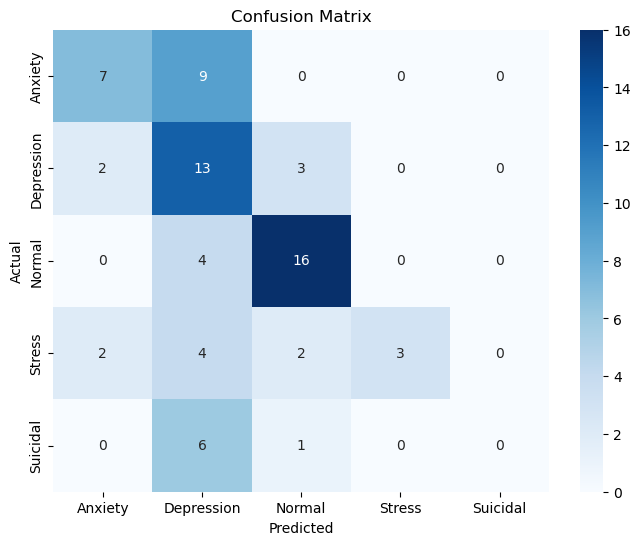

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
import pickle

pickle.dump(model, open("mental_health_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))

In [47]:
loaded_model = pickle.load(open("mental_health_model.pkl", "rb"))
loaded_tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))

In [48]:
print(df['status'].value_counts())


status
1    67
2    65
0    55
3    36
4    14
Name: count, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [51]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [52]:
# Check the class distribution in the dataset
print(df['status'].value_counts())


status
1    67
2    65
0    55
3    36
4    14
Name: count, dtype: int64


In [53]:
# Increase the number of features or try bigrams
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [54]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [55]:
import re
import string

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove new lines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text


              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.47      0.70      0.56        20
           2       0.88      0.75      0.81        20
           3       0.88      0.64      0.74        11
           4       0.20      0.25      0.22         4

    accuracy                           0.67        72
   macro avg       0.67      0.60      0.62        72
weighted avg       0.74      0.67      0.68        72



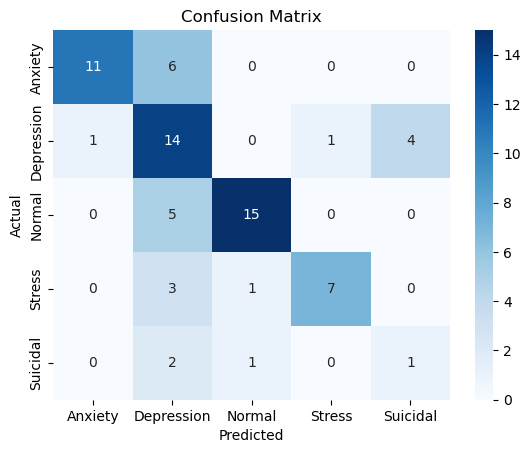

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [63]:
sample = (input("Enter your caption"))
sample_text = [sample] 
sample_tfidf = loaded_tfidf.transform(sample_text)
prediction = loaded_model.predict(sample_tfidf) 
print("Predicted Status:", label_encoder.inverse_transform(prediction))
#getting sleepy,Normal
#In tired of everything. Cant wait to die.,Suicidal
#i feel so sad,Depression
#i feel so nervous,Anxiety

Predicted Status: ['Depression']


In [64]:
# Step: Provide recommendations based on predicted mental health status
def provide_recommendation(label):
    recommendations = {
        "Normal": "You seem to be in a balanced state. Keep practicing healthy routines and mindfulness.",
        "Depression": "You might be feeling low. Please talk to someone you trust or consider professional support.",
        "Anxiety": "If you’re feeling anxious, try breathing exercises or meditation. Seek help if it persists.",
        "Suicidal": "Your message is deeply concerning. Please seek immediate help from a mental health professional or a helpline.",
        "Personality disorder": "It may help to explore therapy options tailored to your personality experiences.",
        "Bipolar": "Managing mood swings can be challenging. It’s helpful to maintain a routine, track your moods, and stay connected with a mental health professional.",
        "Other": "Consider monitoring your mental state and journaling your thoughts. If discomfort grows, seek help."
    }

    return recommendations.get(label, "We're here for you. Consider reaching out for support when needed.")

# Apply recommendation
predicted_status = label_encoder.inverse_transform(prediction)[0]
print("Predicted Status:", predicted_status)
print("Recommendation:", provide_recommendation(predicted_status))


Predicted Status: Depression
Recommendation: You might be feeling low. Please talk to someone you trust or consider professional support.
